# API ESIOS

## Import libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Set headers for API REST request

In [2]:
token = 'b69f49f19668733416d36d75533072cba8ebf0562564dc2efc32ca04a9dc756e'
headers = dict()
headers['Accept'] = 'application/json; application/vnd.esios-api-v1+json'
headers['Content-Type'] = 'application/json'
headers['Host'] = 'api.esios.ree.es'
headers['x-api-key'] = token
headers['Cookie'] = ''

headers

{'Accept': 'application/json; application/vnd.esios-api-v1+json',
 'Content-Type': 'application/json',
 'Host': 'api.esios.ree.es',
 'x-api-key': 'b69f49f19668733416d36d75533072cba8ebf0562564dc2efc32ca04a9dc756e',
 'Cookie': ''}

In [31]:
params = {'start_date': '2023-04-01T00:00', 'end_date': '2023-04-19T23:00'}
    # https://api.esios.ree.es/indicators/1373?start_date=' + '2023-04-10T00:00:00' + 'Z&end_date=' + '2023-04-10T23:00:00' + 'Z'
response = requests.get("https://api.esios.ree.es/indicators/600?start_date=2023-04-01T00%3A00%3A00&end_date=2023-04-19T00%3A00%3A00", headers=headers)
response.status_code

200

In [4]:
df = pd.DataFrame(response.json()['indicator']['values'])

In [5]:
df.datetime = pd.to_datetime(df.datetime, utc = True)

## GET request

### Request for list of existing indicators in the API

In [ ]:
r = requests.get('https://api.esios.ree.es/indicators' , headers=headers) # This url returns an indexed table with all indicators provided through the API
r.status_code

In [ ]:
indice = pd.DataFrame((r.json()["indicators"]))

In [ ]:
indice.to_excel("indice_datos_ESIOS.xlsx", index=False)

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/1373?start_date=' + '2023-04-10T00:00:00' + 'Z&end_date=' + '2023-04-10T23:00:00' + 'Z', headers=headers)

In [ ]:
l.status_code

In [ ]:
indicator = '1929'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
ll = requests.get('https://api.esios.ree.es/indicators/683?start_date=' + '2023-01-01T00:00:00' + 'Z&end_date=' + '2023-03-30T00:00:00' + 'Z', headers=headers)

In [ ]:
df = pd.DataFrame(l.json()['indicator']["values"])

In [ ]:
df.rename(columns={'value':'Fase_I_subir'}, inplace=True)
df.columns

In [ ]:
pd.to_datetime(df.datetime)

In [ ]:
df.datetime = pd.to_datetime(df.datetime, utc = True)

In [ ]:
df = (df[["datetime","geo_name","value"]])
df.datetime = pd.to_datetime(df.datetime, utc = True)

In [ ]:
df.set_index("datetime", inplace = True)

In [ ]:
sns.lineplot(data = df, )

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df["Month"] = df.datetime.dt.month
df["Day"] = df.datetime.dt.day

In [ ]:
df.query('geo_name == "España"').groupby(["Month","Day"], as_index=False).agg({"value":["max","min"]})

In [ ]:
df2 = pd.DataFrame(ll.json()['indicator']["values"])[["datetime","value"]]

In [ ]:
df2.datetime = pd.to_datetime(df2.datetime, utc = True)
df.datetime = pd.to_datetime(df.datetime, utc = True)

In [ ]:
df

In [ ]:
df2

In [ ]:
df = df.set_index("datetime")
df2 = df2.set_index("datetime")

In [ ]:
df = df.rename(columns = {"value":"EUR_MWh_SUBIR"})
df2 = df2.rename(columns = {"EUR_MWh_SUBIR":"EUR_MWh_BAJAR"})

In [ ]:
df3 = df.join(df2)

In [ ]:
df3.plot()

In [ ]:
df3.to_csv("precios_secundaria_2023.csv")

In [ ]:
df = df.rename(columns = {"value":"EUR_MWh_SUBIR"})

In [ ]:
df2.rename(columns={"value":"EUR_MWh_BAJAR"}, inplace=True)

In [ ]:
df.index

In [ ]:
df2.index 

In [ ]:
df.join(df2)

In [ ]:
d = []
for r in drse.iterrows():
  l = requests.get('https://api.esios.ree.es/indicators/682?start_date=' + r[1]["start"] + 'Z&end_date=' + r[1]["end"] + 'Z', headers=headers)
  for t in l.json()['indicator']['values']:
    d.append(t)

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df.plot(x = 'datetime', y = 'value', figsize = (25,7))

In [ ]:
df.to_parquet('demand_esp.parquet', index = False)

In [ ]:
df.columns

In [ ]:
df.datetime = pd.to_datetime(df.datetime)

In [ ]:
df.rename(columns={"geo_name":"unique_id",
                   "datetime":"ds",
                   "value":"y"}, inplace = True)

In [ ]:
df.drop(columns=['datetime_utc', 'tz_time', 'geo_id'], inplace=True)
df.head()

In [ ]:
df = df[["unique_id","ds","y"]]

In [ ]:
!pip install statsforecast
!pip install datasetsforecast
!pip install prophet
!pip install "neuralprophet[live]"

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA, SeasonalNaive
from statsforecast.utils import AirPassengers as ap

## definición función API

In [20]:
def esios_api(indicator:int, token:str, start_date:str, end_date:str, headers:dict):
    response = requests.get('https://api.esios.ree.es/indicators/' + str(indicator), headers=headers, params=params)
    print(response.url)
    if response.status_code != 200:
        raise ValueError(f'Request failed with status code {response.status_code}: {response.text}')
    print(response.status_code)
    
    return response.json()

In [21]:
df = pd.DataFrame(esios_api(600, token, '2023-04-01T00:00', '2023-04-19T00:00', headers=headers)['indicator']['values'])
df.datetime = pd.to_datetime(df.datetime, utc = True)

https://api.esios.ree.es/indicators/600?start_date=2023-04-01T00%3A00&end_date=2023-04-19T23%3A00
200


In [ ]:
%matplotlib inline

<AxesSubplot:xlabel='datetime'>

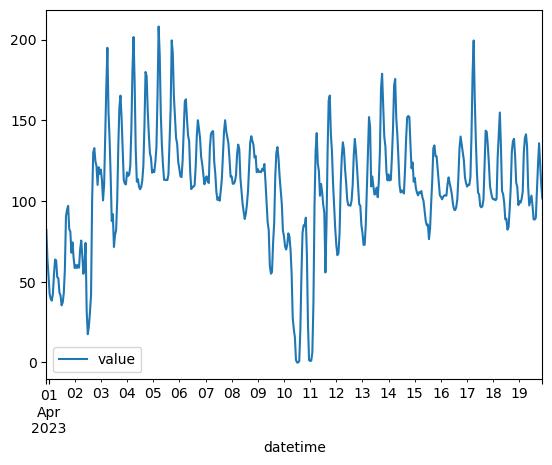

In [23]:
df.query("geo_name == 'Francia'").plot(x = 'datetime', y = 'value')

## Dash

In [ ]:
df.dtypes

### no choice

In [ ]:
import dash
from dash import dcc
from dash import html
# import pandas as pd
import plotly.graph_objs as go

# Load the dataframe
# df = pd.read_csv('your_dataframe.csv')

# Define the app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("2D Plot Dashboard"),
    html.Div([
        dcc.Dropdown(
            id='x-axis',
            options=[{'label': col, 'value': col} for col in df.columns],
            value=df.columns[0]
        )
    ],
    style={'width': '48%', 'display': 'inline-block'}),
    html.Div([
        dcc.Dropdown(
            id='y-axis',
            options=[{'label': col, 'value': col} for col in df.columns],
            value=df.columns[1]
        )
    ],
    style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    dcc.Graph(id='scatter-plot')
])

# Define the callbacks
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('x-axis', 'value'),
     dash.dependencies.Input('y-axis', 'value')])
def update_scatter_plot(xaxis_column_name, yaxis_column_name):
    return {'data': [go.Scatter(
                        x=df[xaxis_column_name],
                        y=df[yaxis_column_name],
                        mode='lines'
                    )],
            'layout': go.Layout(
                xaxis={'title': xaxis_column_name},
                yaxis={'title': yaxis_column_name},
                hovermode='closest'
            )}

# Run the app
if __name__ == '__main__':
    app.run_server(port=8051)


### One choice

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go

# Load data
# df = pd.read_csv('data.csv')

# Define app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Spot Prices in Europe"),
    html.Label('X-axis'),
    dcc.Dropdown(
        id='x-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[0]
    ),
    html.Label('Y-axis'),
    dcc.Dropdown(
        id='y-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[1]
    ),
    html.Label('Country'),
    dcc.Dropdown(
        id='category',
        options=[{'label': cat, 'value': cat} for cat in df['geo_name'].unique()],
        value=df['geo_name'].unique()[0]
    ),
    dcc.Graph(id='scatter-plot')
])

# Define callback
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('x-axis', 'value'),
     dash.dependencies.Input('y-axis', 'value'),
     dash.dependencies.Input('category', 'value')])
def update_plot(x_col, y_col, category):
    filtered_df = df[df['geo_name'] == category]  # Filter the DataFrame by category
    trace = go.Scatter(
        x=filtered_df[x_col],
        y=filtered_df[y_col],
        mode='lines'
    )
    layout = go.Layout(
        xaxis={'title': x_col},
        yaxis={'title': y_col},
        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
        hovermode='closest'
    )
    return {'data': [trace], 'layout': layout}

# Run app
if __name__ == '__main__':
    app.run_server(port = 8051)

### multiple choice with steps

In [6]:
df.drop(columns=['datetime_utc', 'tz_time', 'geo_id'], inplace=True)
df.head()

,value,datetime,geo_name
0,82.19,2023-03-31 22:00:00+00:00,Portugal
1,82.19,2023-03-31 22:00:00+00:00,Francia
2,82.19,2023-03-31 22:00:00+00:00,España
3,97.50,2023-03-31 22:00:00+00:00,Reino Unido
4,130.48,2023-03-31 22:00:00+00:00,Italia


In [7]:
df = df.astype({'geo_name':'category'})
df = df[['datetime','geo_name','value']]

In [8]:
import plotly
import plotly.express as px

In [9]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.graph_objs as go

# Load data
# df = pd.read_csv('data.csv')

# Define app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Spot prices in Europe"),
    html.H5("Pick X-axis data"),
    # html.Label('X-axis'),
    dcc.Dropdown(
        id='x-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[0]
    ),
    html.H5("Pick Y-axis data"),
    # html.Label('Y-axis'),
    dcc.Dropdown(
        id='y-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[2]
    ),
    html.Label('Categories'),
    dcc.Dropdown(
        id='categories',
        options=[{'label': cat, 'value': cat} for cat in df['geo_name'].unique()],
        value=df['geo_name'].unique(),
        multi=True
    ),
    dcc.Graph(id='scatter-plot')
])

# Define callback
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('x-axis', 'value'),
     dash.dependencies.Input('y-axis', 'value'),
     dash.dependencies.Input('categories', 'value')])
def update_plot(x_col, y_col, categories):
    traces = []
    for cat in categories:
        filtered_df = df[df['geo_name'] == cat]  # Filter the DataFrame by category
        trace = go.Scatter(
            x=filtered_df[x_col],
            y=filtered_df[y_col],
            mode='lines',
            line=dict(shape='hv', width=2),  # Set the line shape to horizontal-vertical step
            name=cat  # Set the name of the trace to the category name
        )
        traces.append(trace)
    layout = go.Layout(
        xaxis={'title': x_col},
        yaxis={'title': y_col},
        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
        hovermode='closest'
    )
    return {'data': traces, 'layout': layout}

# Run app
if __name__ == '__main__':
    app.run()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [21/Apr/2023 23:47:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Apr/2023 23:47:59] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [21/Apr/2023 23:47:59] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [21/Apr/2023 23:47:59] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [21/Apr/2023 23:47:59] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [21/Apr/2023 23:48:00] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [21/Apr/2023 23:48:00] "POST /_dash-update-component HTTP/1.1" 200 -


### Dashboard and API call

<span style="color:red">IT IS STILL UNDER CONSTRUCTION. I JUST COPIED AND PASTED FROM chatGPT.</span>

In [34]:
%%writefile app.py 

import requests
import datetime
import pandas as pd
import dash
from dash import dcc, html
import plotly.graph_objs as go

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1(children='API Data Dashboard'),
    html.Div(children='''
        Select start and end timestamps:
    '''),
    dcc.Input(id='start-timestamp', type='text', value='2023-04-01T00:00:00'),
    dcc.Input(id='end-timestamp', type='text', value='2023-04-19T00:00:00'),
    html.Div(children='''
        Enter API token:
    '''),
    dcc.Input(id='api-token', type='text', value=''),
    html.Button('Submit', id='submit-button'),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('submit-button', 'n_clicks')],
    [dash.dependencies.State('start-timestamp', 'value'),
     dash.dependencies.State('end-timestamp', 'value'),
     dash.dependencies.State('api-token', 'value')])
def update_plot(n_clicks, start_timestamp, end_timestamp, api_token):
    # Parse the start and end timestamps using the datetime module
    start_dt = datetime.datetime.fromisoformat(start_timestamp)
    end_dt = datetime.datetime.fromisoformat(end_timestamp)
    
    # Make the API request using the requests library
    headers = dict()
    headers['Accept'] = 'application/json; application/vnd.esios-api-v1+json'
    headers['Content-Type'] = 'application/json'
    headers['Host'] = 'api.esios.ree.es'
    headers['x-api-key'] = api_token
    headers['Cookie'] = ''
    
    # print(api_token)
    
    params = {'start_date': start_dt.isoformat(), 'end_date': end_dt.isoformat()}
    # https://api.esios.ree.es/indicators/1373?start_date=' + '2023-04-10T00:00:00' + 'Z&end_date=' + '2023-04-10T23:00:00' + 'Z'
    response = requests.get('https://api.esios.ree.es/indicators/600', headers=headers, params=params)
    print(response.status_code)
    print(response.url)
    print(response.json()['indicator']['values'])
    if response.status_code != 200:
        raise ValueError(f'Request failed with status code {response.status_code}: {response.text}')
    data = response.json()['indicator']['values']
    
    # Convert the API response to a Pandas DataFrame
    df = pd.DataFrame(data)
    df.datetime = pd.to_datetime(df.datetime, utc = True)
    # Create the plot
    traces = []
    for category in df['geo_name'].unique():
        filtered_df = df.loc[df['geo_name'] == category]
        trace = go.Scatter(
            x=pd.to_datetime(filtered_df['datetime'], utc = True),
            y=filtered_df['value'],
            mode='lines',
            name=category
        )
        traces.append(trace)
    layout = go.Layout(
        xaxis={'title': 'Timestamp'},
        yaxis={'title': 'Value'},
        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
        hovermode='closest'
    )
    return {'data': traces, 'layout': layout}

if __name__ == '__main__':
    app.run()

Writing app.py


In [ ]:
dash.__version__

In [ ]:
import plotly

In [ ]:
plotly.__version__

In [ ]:
import dash

## Respuesta activa de la demanda

### Indicadores relevantes

nombre|ID
:-------:|:-----:
Potencia activada en el servicio de respuesta activa de la demanda|1929
Precio marginal en el servicio de respuesta activa de la demanda|1930
Energía asignada en el servicio de respuesta activa de la demanda|1931
Derechos de cobro de la activación del servicio de respuesta activa de la demanda|1932
Precio medio ponderado de activación del servicio de respuesta activa de la demanda|10412

### Potencia activada

In [ ]:
indicator = '1929'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Precio marginal

In [ ]:
indicator = '1930'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Energía asignada

In [ ]:
indicator = '1931'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Derechos de cobro de la activación del servicio de respuesta activa de la demanda

In [ ]:
indicator = '1932'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Precio medio ponderado de activación del servicio de respuesta activa de la demanda

In [ ]:
indicator = '10412'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

## Reserva Terciaria